In [ ]:
!pip install pycryptodome

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import imageio
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.Random import get_random_bytes

##Encryption

Saving buah-buahan.jpg to buah-buahan.jpg


<ipython-input-12-78f7a3876aec>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(file_name)


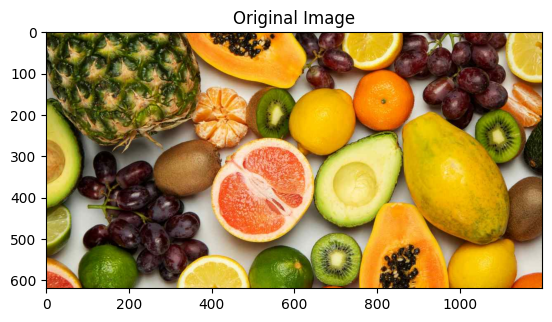

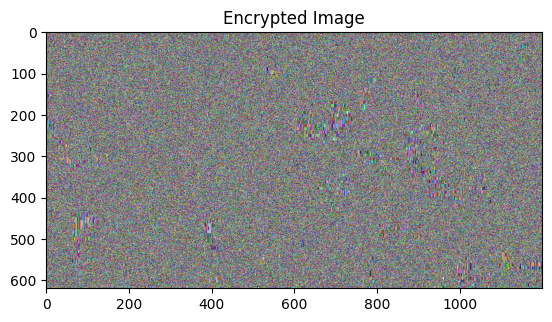

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Upload an image file
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]

# Load the uploaded image using imageio
img = imageio.imread(file_name)

# Display the original image
plt.title("Original Image")
plt.imshow(img)
plt.show()

# Generate RSA key pair
key_rsa = RSA.generate(2048)

# Generate a random AES encryption key
key_aes = get_random_bytes(32)  # 32 bytes for AES-256

# Encrypt the AES encryption key with RSA public key
cipher_rsa = PKCS1_OAEP.new(key_rsa.publickey())
encrypted_aes_key = cipher_rsa.encrypt(key_aes)

# Function to split an image into smaller blocks
def split_image(image, block_size):
    h, w, _ = image.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

# Function to combine blocks into an image
def combine_blocks(blocks, image_shape):
    h, w, _ = image_shape
    combined_image = np.zeros(image_shape, dtype=np.uint8)
    index = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = blocks[index]
            combined_image[i:i+block_size, j:j+block_size] = block
            index += 1
    return combined_image

# Define the block size for splitting the image
block_size = 32

# Split the image into smaller blocks for encryption
image_blocks = split_image(img, block_size)

# Encrypt each image block using AES
encrypted_blocks = []

for block in image_blocks:
    cipher_aes = AES.new(key_aes, AES.MODE_ECB)
    encrypted_block = cipher_aes.encrypt(block.tobytes())
    encrypted_block = np.frombuffer(encrypted_block, dtype=np.uint8).reshape(block.shape)
    encrypted_blocks.append(encrypted_block)

# Combine the encrypted blocks into an encrypted image
encrypted_img = combine_blocks(encrypted_blocks, img.shape)

# Display the encrypted image
plt.title("Encrypted Image")
plt.imshow(encrypted_img)
plt.show()

# Save the encrypted image as a file
encrypted_img_filename = "encrypted_image.png"
imageio.imsave(encrypted_img_filename, encrypted_img)

# Provide an option to download the encrypted image
files.download(encrypted_img_filename)

##Decryption

Saving encrypted_image.png to encrypted_image (2).png


<ipython-input-13-f8fd5f344061>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  encrypted_img = imageio.imread(encrypted_img_filename)


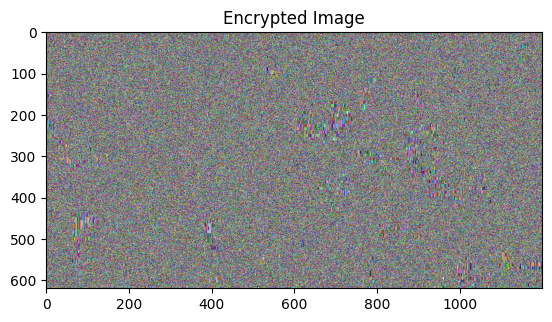

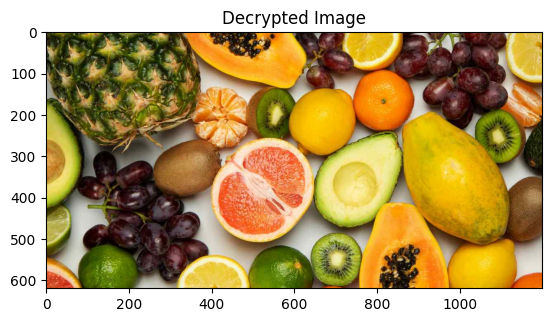

In [ ]:
# Upload the encrypted image file for decryption
uploaded = files.upload()

# Get the first uploaded file
encrypted_img_filename = list(uploaded.keys())[0]

# Load the uploaded encrypted image using imageio
encrypted_img = imageio.imread(encrypted_img_filename)

# Display the encrypted image
plt.title("Encrypted Image")
plt.imshow(encrypted_img)
plt.show()

# Decrypt the image blocks using AES
decrypted_blocks = []

for block in encrypted_blocks:
    cipher_aes = AES.new(key_aes, AES.MODE_ECB)
    decrypted_block = cipher_aes.decrypt(block.tobytes())
    decrypted_block = np.frombuffer(decrypted_block, dtype=np.uint8).reshape(block.shape)
    decrypted_blocks.append(decrypted_block)

# Combine the decrypted blocks into a decrypted image
decrypted_img = combine_blocks(decrypted_blocks, encrypted_img.shape)

# Display the decrypted image
plt.title("Decrypted Image")
plt.imshow(decrypted_img)
plt.show()

## No-Library

Saving buah-buahan.jpg to buah-buahan (1).jpg


<ipython-input-14-ffb7a9d94c55>:122: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(file_name)


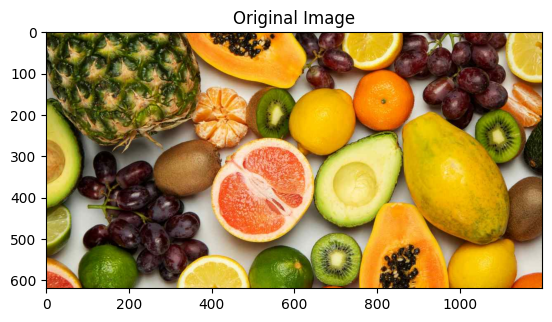

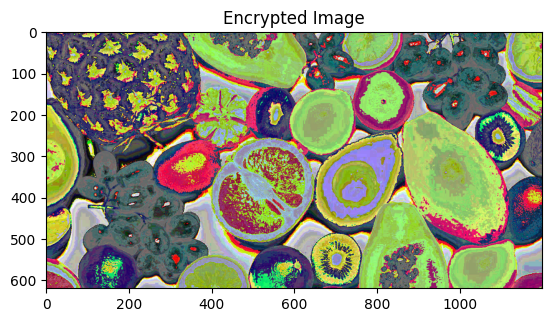

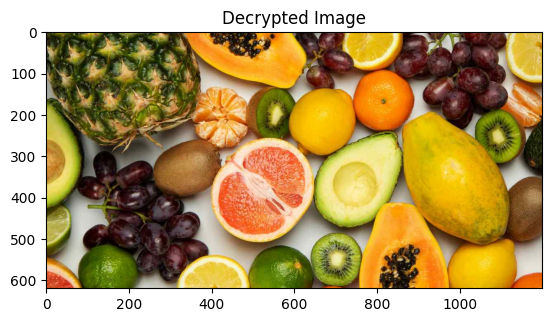

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random
from google.colab import files

# Fungsi untuk mengenkripsi gambar menggunakan AES sederhana
class SimpleAES:
    def __init__(self, key):
        self.key = key

    def encrypt(self, data):
        encrypted_data = bytearray()
        for byte in data:
            encrypted_byte = byte ^ self.key
            encrypted_data.append(encrypted_byte)
        return bytes(encrypted_data)

    def decrypt(self, data):
        return self.encrypt(data)  # Dekripsi sama dengan enkripsi dalam kasus ini

# Fungsi untuk menghasilkan kunci AES acak
def generate_aes_key():
    return random.randint(0, 255)

# Fungsi untuk membagi gambar menjadi blok
def split_image(image, block_size):
    h, w, _ = image.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

# Fungsi untuk menggabungkan blok menjadi gambar
def combine_blocks(blocks, image_shape):
    h, w, _ = image_shape
    combined_image = np.zeros(image_shape, dtype=np.uint8)
    index = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = blocks[index]
            combined_image[i:i+block_size, j:j+block_size] = block
            index += 1
    return combined_image

# Fungsi untuk mengenkripsi gambar dengan AES
def encrypt_image_with_aes(image, aes_key):
    encrypted_blocks = []
    for block in image:
        encrypted_block = aes_key.encrypt(block.tobytes())
        encrypted_block = np.frombuffer(encrypted_block, dtype=np.uint8).reshape(block.shape)
        encrypted_blocks.append(encrypted_block)
    return encrypted_blocks

# Implementasi sederhana RSA untuk enkripsi dan dekripsi AES key
def encrypt_aes_key_with_rsa(aes_key, rsa_public_key):
    n, e = rsa_public_key
    encrypted_aes_key = [pow(key, e, n) for key in aes_key]
    return encrypted_aes_key

def decrypt_aes_key_with_rsa(encrypted_aes_key, rsa_private_key):
    n, d = rsa_private_key
    decrypted_aes_key = [pow(ciphertext, d, n) for ciphertext in encrypted_aes_key]
    return decrypted_aes_key

# Fungsi untuk mengenkripsi gambar
def encrypt_image(image, rsa_public_key):
    aes_key = [generate_aes_key() for _ in range(32)]  # Generate AES key
    encrypted_aes_key = encrypt_aes_key_with_rsa(aes_key, rsa_public_key)  # Encrypt AES key with RSA

    # Split image into blocks and encrypt each block with AES
    image_blocks = split_image(image, block_size)
    encrypted_blocks = encrypt_image_with_aes(image_blocks, SimpleAES(aes_key[0]))

    # Combine encrypted blocks into an encrypted image
    encrypted_image = combine_blocks(encrypted_blocks, image.shape)

    return encrypted_image, encrypted_aes_key

# Fungsi untuk mendekripsi gambar
def decrypt_image(encrypted_image, encrypted_aes_key, rsa_private_key):
    # Decrypt AES key with RSA
    aes_key = decrypt_aes_key_with_rsa(encrypted_aes_key, rsa_private_key)

    # Decrypt each block of the image with AES
    image_blocks = split_image(encrypted_image, block_size)
    decrypted_blocks = encrypt_image_with_aes(image_blocks, SimpleAES(aes_key[0]))

    # Combine decrypted blocks into the original image
    original_image = combine_blocks(decrypted_blocks, encrypted_image.shape)

    return original_image

# Generate RSA key pair
def generate_rsa_key_pair():
    # Generate two large prime numbers, p and q
    p = 174440041  # Replace with a larger prime number
    q = 88362852307  # Replace with another larger prime number
    n = p * q
    totient = (p - 1) * (q - 1)

    # Choose an integer e such that 1 < e < totient and gcd(e, totient) = 1
    e = 17  # Replace with an appropriate value

    # Compute d, the modular multiplicative inverse of e (mod totient)
    d = pow(e, -1, totient)

    public_key = (n, e)
    private_key = (n, d)

    return private_key, public_key

# Upload an image file
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]

# Load the uploaded image using imageio
img = imageio.imread(file_name)
# Display the original image
plt.title("Original Image")
plt.imshow(img)
plt.show()

# Define the block size for splitting the image
block_size = 64

# Generate RSA key pair
rsa_private_key, rsa_public_key = generate_rsa_key_pair()

# Encrypt the image
encrypted_image, encrypted_aes_key = encrypt_image(img, rsa_public_key)

# Display the encrypted image
plt.title("Encrypted Image")
plt.imshow(encrypted_image)
plt.show()

# Decrypt the image
decrypted_image = decrypt_image(encrypted_image, encrypted_aes_key, rsa_private_key)

# Display the decrypted image
plt.title("Decrypted Image")
plt.imshow(decrypted_image)
plt.show()